# **Exploratory Data Analysis**
V.01  
In this project we will work on a automobile industry dataset. We will try to find out the characteristics which have the most impact on the car price. We will do basic data wrangling and relationship analysis.

### Import Library and Load Dataset  
Let's import the libraries and load the dataset into an object

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = pd.read_csv(path) 

In [3]:
data.head(5) 

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Add Header to the Dataframe 
As there is no header, let's add headers for all the columns in dataframe.

In [4]:
data.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"] 

In [5]:
data.head(5)  

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Understanding the Dataset
Lets explore the dataset for better understanding of the relations between variables.

In [6]:
data.shape

(204, 26)

In [7]:
data.describe() 

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
data.columns 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
data.nunique() 

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                186
dtype: int64

### Handling Missing Value
Replace the missing (?) value with nan value.

In [10]:
data.replace('?', np.nan, inplace=True) 
data.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [11]:
data.isnull().sum() 

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Replace Missing Data
Replace missing data (nan) with average.

In [12]:
avg_norloss = data['normalized-losses'].astype('float').mean(axis=0) 
data['normalized-losses'].replace(np.nan, avg_norloss, inplace=True) 

In [13]:
avg_bore = data['bore'].astype('float').mean(axis=0) 
data['bore'].replace(np.nan, avg_bore, inplace=True) 

In [14]:
avg_stroke = data['stroke'].astype('float').mean(axis=0) 
data['stroke'].replace(np.nan, avg_stroke, inplace=True) 

In [15]:
avg_horsepower = data['horsepower'].astype('float').mean(axis=0) 
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True) 

In [16]:
avg_peakrpm = data['peak-rpm'].astype('float').mean(axis=0) 
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True) 

Replacing nan value with maximum number of variable

In [17]:
data['num-of-doors'].value_counts().idxmax()

'four'

In [19]:
data['num-of-doors'].replace(np.nan, 'four', inplace=True) 

Drop all rows that do not have price data.

In [20]:
data.dropna(subset=['price'], axis=0, inplace=True) 

In [21]:
data.reset_index(drop=True, inplace=True) 

### Converting Data Types

In [22]:
data[['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']] = data[['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']].astype('float') 

In [23]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Bining Data

In [24]:
data['horsepower'] = data['horsepower'].astype(int, copy=True)  

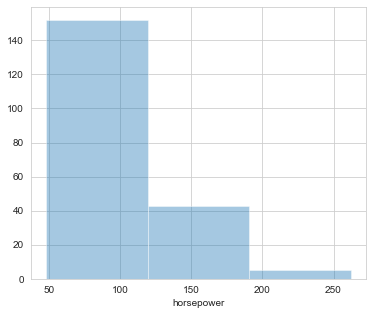

In [25]:
sns.set_style('whitegrid') 
plt.figure(figsize=(6,5))
sns.distplot(data['horsepower'].dropna(), kde=False, bins=3) 

In [27]:
bins = np.linspace(min(data['horsepower']), max(data['horsepower']), 4)
groupname = ['Low', 'Medium', 'High'] 
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=groupname, include_lowest=True) 

In [28]:
data[['horsepower', 'horsepower-binned']].head

<bound method NDFrame.head of      horsepower horsepower-binned
0           111               Low
1           154            Medium
2           102               Low
3           115               Low
4           110               Low
..          ...               ...
195         114               Low
196         160            Medium
197         134            Medium
198         106               Low
199         114               Low

[200 rows x 2 columns]>

In [29]:
data['horsepower-binned'] 

0         Low
1      Medium
2         Low
3         Low
4         Low
        ...  
195       Low
196    Medium
197    Medium
198       Low
199       Low
Name: horsepower-binned, Length: 200, dtype: category
Categories (3, object): [Low < Medium < High]

<BarContainer object of 3 artists>

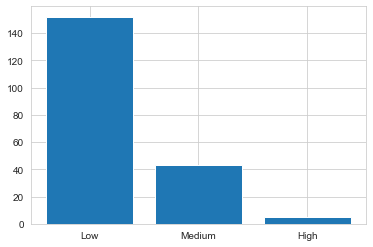

In [30]:
plt.bar(groupname, data['horsepower-binned'].value_counts()) 

### Linear Relationship Analysis  
###### Continuous Numerical Variable
We will try to understand linear relationship between different continuous numerical variable and price. Scatterplot with fitted lines are best way to analyze these variables. By this we will be able to find out which are the potential predictor variable for price.

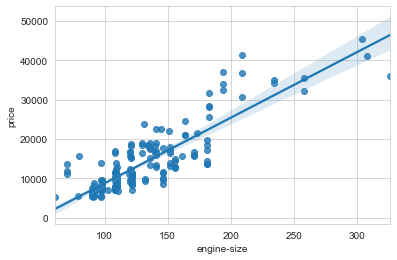

In [31]:
sns.regplot(x='engine-size', y='price', data=data) 

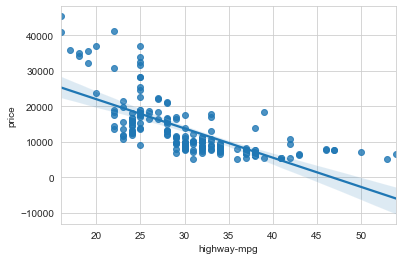

In [35]:
sns.regplot(x='highway-mpg', y='price', data=data) 

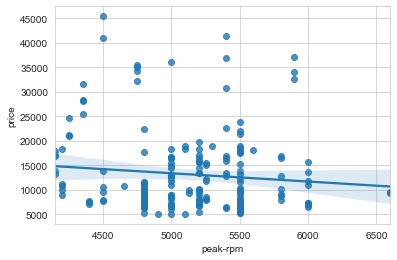

In [36]:
sns.regplot(x='peak-rpm', y='price', data=data) 

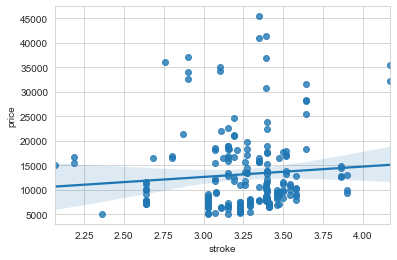

In [51]:
sns.regplot(x='stroke', y='price', data=data) 

In [49]:
data[['engine-size', 'highway-mpg', 'peak-rpm', 'stroke', 'price']].corr() 

,engine-size,highway-mpg,peak-rpm,stroke,price
engine-size,1.000000,-0.679877,-0.256681,0.208133,0.872337
highway-mpg,-0.679877,1.000000,-0.059319,-0.040170,-0.705115
peak-rpm,-0.256681,-0.059319,1.000000,-0.066021,-0.101593
stroke,0.208133,-0.040170,-0.066021,1.000000,0.083298
price,0.872337,-0.705115,-0.101593,0.083298,1.000000


*engine-size* and *highway-mpg* seems like a good predictor for price, as the regression line is almost a perfect diagonal for both of them.

### Linear Relationship Analysis  
###### Categorical Variable
We will try to understand linear relationship between different categorical variable and price. Boxplots are best way to analyze these variables. By this we will be able to find out which are the potential predictor variable for price.

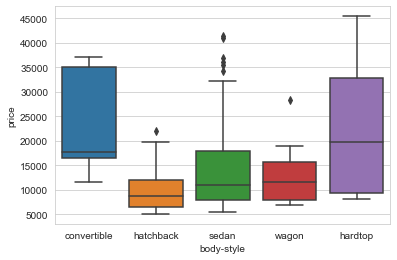

In [38]:
sns.boxplot(x='body-style', y='price', data=data) 

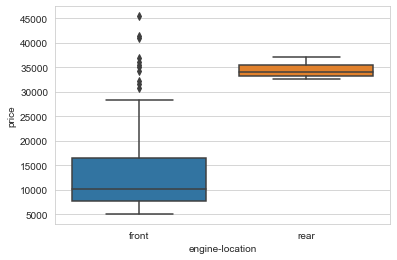

In [39]:
sns.boxplot(x='engine-location', y='price', data=data) 

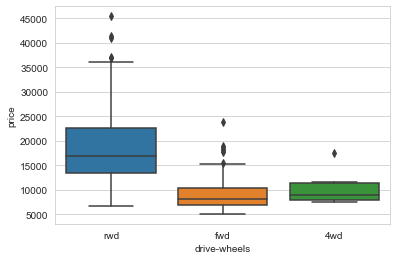

In [40]:
sns.boxplot(x='drive-wheels', y='price', data=data) 

As distribution of price between *drive-wheels* and *engine-location* categories differ, these two could be potential predictors of price.

### Correlation and Causation  
**Pearson Correlation** measures dependence between two variables. (1) positive linear relation, (0) no linear relation, (-1) negetive linear relation

In [52]:
from scipy import stats

In [81]:
coef, p = stats.pearsonr(data['wheel-base'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.589
P-Value : 0.0000


In [82]:
coef, p = stats.pearsonr(data['horsepower'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.810
P-Value : 0.0000


In [83]:
coef, p = stats.pearsonr(data['length'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.691
P-Value : 0.0000


In [84]:
coef, p = stats.pearsonr(data['width'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.753
P-Value : 0.0000


In [85]:
coef, p = stats.pearsonr(data['curb-weight'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.834
P-Value : 0.0000


In [87]:
coef, p = stats.pearsonr(data['engine-size'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.872
P-Value : 0.0000


In [88]:
coef, p = stats.pearsonr(data['bore'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : 0.543
P-Value : 0.0000


In [89]:
coef, p = stats.pearsonr(data['city-mpg'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : -0.687
P-Value : 0.0000


In [90]:
coef, p = stats.pearsonr(data['highway-mpg'], data['price']) 
print('Coefficient : '"%.3f"%coef)
print('P-Value : '"%.4f"%p) 

Coefficient : -0.705
P-Value : 0.0000


### ANOVA Test  
**F-Test Score** calculates the difference between actual means and the assumption. Larger score means larger difference between means.  
**P-Value** tells how significance the test score is. Lower p-value means the correlation is statiscally significance.

In [32]:
group = data[['drive-wheels', 'body-style', 'price']] 
group1 = group[['drive-wheels', 'price']].groupby(['drive-wheels']) 

In [33]:
group1.head(2)  

,drive-wheels,price
0,rwd,16500.0
1,rwd,16500.0
2,fwd,13950.0
3,4wd,17450.0
4,fwd,15250.0
135,4wd,7603.0


In [101]:
f, p = stats.f_oneway(group1.get_group('rwd')['price'], group1.get_group('fwd')['price'], group1.get_group('4wd')['price'])
print('F-test score : '"%.3f"%f)
print('P-Value : '"%.4f"%p) 

F-test score : 68.496
P-Value : 0.0000


In [102]:
f, p = stats.f_oneway(group1.get_group('rwd')['price'], group1.get_group('fwd')['price'])
print('F-test score : '"%.3f"%f)
print('P-Value : '"%.4f"%p) 

F-test score : 131.593
P-Value : 0.0000


In [103]:
f, p = stats.f_oneway(group1.get_group('rwd')['price'], group1.get_group('4wd')['price'])
print('F-test score : '"%.3f"%f)
print('P-Value : '"%.4f"%p) 

F-test score : 8.671
P-Value : 0.0042


In [104]:
f, p = stats.f_oneway(group1.get_group('fwd')['price'], group1.get_group('4wd')['price'])
print('F-test score : '"%.3f"%f)
print('P-Value : '"%.4f"%p) 

F-test score : 0.665
P-Value : 0.4162


### Conclusion: Important Variables  
Now we have a better idea about which variables are important while predicting the car price.  
  - Continuous numerical variables  
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore  
  - Categorical variables:
- Drive-wheels